In [1]:
# import necessary libraries for the analysis
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
gene_list_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_gene_list/protein_coding_only'

large_del_ext = '/large_svs/DEL'
large_dup_ext = '/large_svs/DUP'
large_inv_ext = '/large_svs/INV'

In [3]:
large_del_gene_list_df_names = []

os.chdir(gene_list_path + large_del_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + large_del_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    large_del_gene_list_df_names.append(file_name[:-4])

In [4]:
large_dup_gene_list_df_names = []

os.chdir(gene_list_path + large_dup_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + large_dup_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    large_dup_gene_list_df_names.append(file_name[:-4])

In [5]:
large_inv_gene_list_df_names = []

os.chdir(gene_list_path + large_inv_ext)
temp_files = sorted([i for i in os.listdir(gene_list_path + large_inv_ext) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    large_inv_gene_list_df_names.append(file_name[:-4])

## 1. Type-specific

In [6]:
output_dict_large_del = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in large_del_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-28]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_large_del['gene_name']:
            
            output_dict_large_del['chr'].append(row['chr'])
            output_dict_large_del['start'].append(row['start'])
            output_dict_large_del['end'].append(row['end'])
            output_dict_large_del['gene_id'].append(row['gene_id'])
            output_dict_large_del['gene_name'].append(row['gene_name'])
            output_dict_large_del['gene_type'].append(row['gene_type'])
            
            output_dict_large_del['input_sample_ids'].append([df_name[:-28]])
            output_dict_large_del['count'].append(1)
            output_dict_large_del['exon_count'].append(row['exon_affected'])
            output_dict_large_del['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_large_del['gene_name'].index(row['gene_name'])
                
                output_dict_large_del['input_sample_ids'][temp_ind].append(df_name[:-28])
                
                output_dict_large_del['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_del['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_del['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_large_del['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_del['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_del['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing sample: N_P_BT2013110
Currently analyzin

In [7]:
output_dict_large_dup = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in large_dup_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-28]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_large_dup['gene_name']:
            
            output_dict_large_dup['chr'].append(row['chr'])
            output_dict_large_dup['start'].append(row['start'])
            output_dict_large_dup['end'].append(row['end'])
            output_dict_large_dup['gene_id'].append(row['gene_id'])
            output_dict_large_dup['gene_name'].append(row['gene_name'])
            output_dict_large_dup['gene_type'].append(row['gene_type'])
            
            output_dict_large_dup['input_sample_ids'].append([df_name[:-28]])
            output_dict_large_dup['count'].append(1)
            output_dict_large_dup['exon_count'].append(row['exon_affected'])
            output_dict_large_dup['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_large_dup['gene_name'].index(row['gene_name'])
                
                output_dict_large_dup['input_sample_ids'][temp_ind].append(df_name[:-28])
                
                output_dict_large_dup['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_dup['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_dup['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_large_dup['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_dup['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_dup['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])


Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [8]:
output_dict_large_inv = {'chr':[], 'start':[], 'end':[], 'gene_id':[], 'gene_name':[], 'gene_type':[], \
               'input_sample_ids':[], 'count':[], 'exon_count':[], 'CDS_count':[]}

for df_name in large_inv_gene_list_df_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-28]))

    temp_df = globals()[df_name]
    
    # For each sample, each gene can only be counted once
    # Affected exon/CDS can also only be counted once 
    # (e.g., multiple SVs affecting exon of a single gene will only be counted once)
    
    counted_genes = []
    counted_exon_genes = []
    counted_cds_genes = []
    
    for ind, row in temp_df.iterrows():
        
        if row['gene_name'] not in output_dict_large_inv['gene_name']:
            
            output_dict_large_inv['chr'].append(row['chr'])
            output_dict_large_inv['start'].append(row['start'])
            output_dict_large_inv['end'].append(row['end'])
            output_dict_large_inv['gene_id'].append(row['gene_id'])
            output_dict_large_inv['gene_name'].append(row['gene_name'])
            output_dict_large_inv['gene_type'].append(row['gene_type'])
            
            output_dict_large_inv['input_sample_ids'].append([df_name[:-28]])
            output_dict_large_inv['count'].append(1)
            output_dict_large_inv['exon_count'].append(row['exon_affected'])
            output_dict_large_inv['CDS_count'].append(row['CDS_affected'])

            # Append into temp arrays for this sample
            counted_genes.append(row['gene_name'])

            if row['exon_affected'] == 1:
                counted_exon_genes.append(row['gene_name'])
                
            if row['CDS_affected'] == 1:
                counted_cds_genes.append(row['gene_name'])
            
        
        else:
            
            if row['gene_name'] not in counted_genes:
                
                temp_ind = output_dict_large_inv['gene_name'].index(row['gene_name'])
                
                output_dict_large_inv['input_sample_ids'][temp_ind].append(df_name[:-28])
                
                output_dict_large_inv['count'][temp_ind] += 1
                counted_genes.append(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_inv['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_inv['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])

                
            else:
                
                temp_ind = output_dict_large_inv['gene_name'].index(row['gene_name'])

                # Exon
                
                if row['gene_name'] not in counted_exon_genes:
                    output_dict_large_inv['exon_count'][temp_ind] += row['exon_affected']
                
                if row['exon_affected'] == 1:
                    counted_exon_genes.append(row['gene_name'])

                # CDS
                
                if row['gene_name'] not in counted_cds_genes:
                    output_dict_large_inv['CDS_count'][temp_ind] += row['CDS_affected']

                if row['CDS_affected'] == 1:
                    counted_cds_genes.append(row['gene_name'])


Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: N_P_BT2013110
Currently analyzin

In [9]:
output_df_large_del = pd.DataFrame.from_dict(output_dict_large_del)

output_df_large_dup = pd.DataFrame.from_dict(output_dict_large_dup)

output_df_large_inv = pd.DataFrame.from_dict(output_dict_large_inv)


In [10]:
output_df_large_del_sorted = output_df_large_del.sort_values('count', ascending=False)
output_df_large_del_sorted = output_df_large_del_sorted.reset_index(drop=True)

large_del_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_large_del_sorted.to_csv((large_del_hotspot_path + 'large_del_hotspot_protein_only.csv'), index=False, sep=',')

In [11]:
output_df_large_dup_sorted = output_df_large_dup.sort_values('count', ascending=False)
output_df_large_dup_sorted = output_df_large_dup_sorted.reset_index(drop=True)

large_dup_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_large_dup_sorted.to_csv((large_dup_hotspot_path + 'large_dup_hotspot_protein_only.csv'), index=False, sep=',')

In [12]:
output_df_large_inv_sorted = output_df_large_inv.sort_values('count', ascending=False)
output_df_large_inv_sorted = output_df_large_inv_sorted.reset_index(drop=True)

large_inv_hotspot_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/'
output_df_large_inv_sorted.to_csv((large_inv_hotspot_path + 'large_inv_hotspot_protein_only.csv'), index=False, sep=',')

# ClinGen Annotation

### Large DELs

In [13]:
clingen = pd.read_table("/Users/ryanyutian/Desktop/annotation_dataset/Clingen_Gene_Disease_Summary.csv", \
                        sep = ",")
clingen

,GENE SYMBOL,GENE ID (HGNC),DISEASE LABEL,DISEASE ID (MONDO),MOI,SOP,CLASSIFICATION,ONLINE REPORT,CLASSIFICATION DATE,GCEP
0,A2ML1,HGNC:23336,Noonan syndrome,MONDO:0018997,AD,SOP5,Disputed,https://search.clinicalgenome.org/kb/gene-vali...,2018-06-07T16:00:00.000Z,RASopathy
1,AARS1,HGNC:20,undetermined early-onset epileptic encephalopathy,MONDO:0018614,AR,SOP6,Limited,https://search.clinicalgenome.org/kb/gene-vali...,2018-11-20T17:00:00.000Z,Epilepsy
2,AARS2,HGNC:21022,mitochondrial disease,MONDO:0044970,AR,SOP8,Definitive,https://search.clinicalgenome.org/kb/gene-vali...,2022-04-18T16:00:00.000Z,Mitochondrial Diseases
3,AASS,HGNC:17366,hyperlysinemia,MONDO:0009388,AR,SOP9,Definitive,https://search.clinicalgenome.org/kb/gene-vali...,2022-10-14T16:00:00.000Z,Aminoacidopathy
4,ABAT,HGNC:23,developmental and epileptic encephalopathy,MONDO:0100062,AR,SOP8,Moderate,https://search.clinicalgenome.org/kb/gene-vali...,2022-04-19T16:00:00.000Z,Epilepsy
...,...,...,...,...,...,...,...,...,...,...
2044,ZNF423,HGNC:16762,nephronophthisis,MONDO:0019005,AR,SOP8,Limited,https://search.clinicalgenome.org/kb/gene-vali...,2022-03-23T16:00:00.000Z,Kidney Cystic and Ciliopathy Disorders
2045,ZNF462,HGNC:21684,weiss-kruszka syndrome,MONDO:0032836,AD,SOP7,Definitive,https://search.clinicalgenome.org/kb/gene-vali...,2020-08-25T13:10:51.689Z,Syndromic Disorders
2046,ZNF674,HGNC:17625,X-linked intellectual disability,MONDO:0100284,XL,SOP8,Disputed,https://search.clinicalgenome.org/kb/gene-vali...,2021-05-04T17:00:00.000Z,Intellectual Disability and Autism
2047,ZNF711,HGNC:13128,X-linked complex neurodevelopmental disorder,MONDO:0100148,XL,SOP9,Definitive,https://search.clinicalgenome.org/kb/gene-vali...,2022-09-22T06:00:00.000Z,Intellectual Disability and Autism


In [14]:
output_df_large_del_sorted

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
0,chr1,145289900,145425603,ENSG00000162825.18,NBPF20,protein_coding,"[B_P_GBM593, E_R_GBM781, F_P_GBM620, F_R_GBM69...",13,13,13
1,chr9,22002903,22009305,ENSG00000147883.12,CDKN2B,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13
2,chr9,21967752,21995301,ENSG00000147889.18,CDKN2A,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13
3,chr9,21802636,21937651,ENSG00000099810.21,MTAP,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13
4,chr9,20658309,20995955,ENSG00000188352.13,FOCAD,protein_coding,"[C_P_GBM577, F_R_GBM691, I_P_GBM440, J_P_GBM40...",12,12,11
...,...,...,...,...,...,...,...,...,...,...
8616,chr6,57046532,57055239,ENSG00000168116.14,KIAA1586,protein_coding,[K_R_GBM832],1,1,1
8617,chr6,57086844,57170305,ENSG00000112200.17,ZNF451,protein_coding,[K_R_GBM832],1,1,1
8618,chr6,57172326,57189833,ENSG00000112208.11,BAG2,protein_coding,[K_R_GBM832],1,1,1
8619,chr6,57186992,57222307,ENSG00000112210.12,RAB23,protein_coding,[K_R_GBM832],1,1,1


In [15]:
temp_disease_label = []
temp_classification = []
temp_gcep = []

for index, row in output_df_large_del_sorted.iterrows():

    if row['gene_name'] in clingen['GENE SYMBOL'].tolist():
        
        temp_disease_label.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['DISEASE LABEL'].tolist()[0])
        temp_classification.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['CLASSIFICATION'].tolist()[0])
        temp_gcep.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['GCEP'].tolist()[0])
        
    else: 
        
        temp_disease_label.append('N/A')
        temp_classification.append('N/A')
        temp_gcep.append('N/A')


output_df_large_del_sorted['disease_label'] = temp_disease_label
output_df_large_del_sorted['classification'] = temp_classification
output_df_large_del_sorted['gcep'] = temp_gcep


In [16]:
output_df_large_del_sorted

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
0,chr1,145289900,145425603,ENSG00000162825.18,NBPF20,protein_coding,"[B_P_GBM593, E_R_GBM781, F_P_GBM620, F_R_GBM69...",13,13,13,N/A,N/A,N/A
1,chr9,22002903,22009305,ENSG00000147883.12,CDKN2B,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,N/A,N/A,N/A
2,chr9,21967752,21995301,ENSG00000147889.18,CDKN2A,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,melanoma-pancreatic cancer syndrome,Definitive,Hereditary Cancer
3,chr9,21802636,21937651,ENSG00000099810.21,MTAP,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,diaphyseal medullary stenosis-bone malignancy ...,Moderate,Hereditary Cancer
4,chr9,20658309,20995955,ENSG00000188352.13,FOCAD,protein_coding,"[C_P_GBM577, F_R_GBM691, I_P_GBM440, J_P_GBM40...",12,12,11,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8616,chr6,57046532,57055239,ENSG00000168116.14,KIAA1586,protein_coding,[K_R_GBM832],1,1,1,N/A,N/A,N/A
8617,chr6,57086844,57170305,ENSG00000112200.17,ZNF451,protein_coding,[K_R_GBM832],1,1,1,N/A,N/A,N/A
8618,chr6,57172326,57189833,ENSG00000112208.11,BAG2,protein_coding,[K_R_GBM832],1,1,1,N/A,N/A,N/A
8619,chr6,57186992,57222307,ENSG00000112210.12,RAB23,protein_coding,[K_R_GBM832],1,1,1,RAB23-related Carpenter syndrome,Definitive,Craniofacial Malformations


In [17]:
output_df_large_del_sorted[output_df_large_del_sorted['disease_label'] != 'N/A']

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
2,chr9,21967752,21995301,ENSG00000147889.18,CDKN2A,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,melanoma-pancreatic cancer syndrome,Definitive,Hereditary Cancer
3,chr9,21802636,21937651,ENSG00000099810.21,MTAP,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,diaphyseal medullary stenosis-bone malignancy ...,Moderate,Hereditary Cancer
38,chr10,47322454,47327588,ENSG00000263761.3,GDF2,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,pulmonary arterial hypertension,Definitive,Pulmonary Hypertension
50,chr13,49531946,49585558,ENSG00000136144.12,RCBTB1,protein_coding,"[A_RR_GBM809, B_P_GBM593, I_P_GBM440, J_RR_GBM...",8,8,6,RCBTB1-related retinopathy,Definitive,Retina
63,chr10,43077064,43130351,ENSG00000165731.21,RET,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,multiple endocrine neoplasia type 2B,Definitive,Hereditary Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,chr6,79484991,79537458,ENSG00000135338.14,LCA5,protein_coding,[K_R_GBM832],1,1,1,LCA5-related retinopathy,Definitive,Retina
8578,chr6,79914814,79947553,ENSG00000118402.6,ELOVL4,protein_coding,[K_R_GBM832],1,1,1,Stargardt disease 3,Definitive,Retina
8580,chr6,80106647,80346270,ENSG00000083123.15,BCKDHB,protein_coding,[K_R_GBM832],1,1,1,maple syrup urine disease type 1B,Definitive,Aminoacidopathy
8614,chr6,56457987,56954830,ENSG00000151914.22,DST,protein_coding,[K_R_GBM832],1,1,1,hereditary sensory and autonomic neuropathy ty...,Definitive,Charcot-Marie-Tooth


### Large DUPs

In [18]:
output_df_large_dup_sorted

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
0,chr7,77022306,77032361,ENSG00000186645.11,SPDYE17,protein_coding,"[B_P_GBM593, C_P_GBM577, E_R_GBM781, F_R_GBM69...",15,15,15
1,chr7,65373799,65401136,ENSG00000146757.14,ZNF92,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",14,14,14
2,chr7,78017055,79453667,ENSG00000187391.22,MAGI2,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, H_R_GBM49...",13,13,13
3,chr7,64971772,65006684,ENSG00000152926.16,ZNF117,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",13,13,13
4,chr7,64207203,64220290,ENSG00000223614.6,ZNF735,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",13,13,13
...,...,...,...,...,...,...,...,...,...,...
8387,chr2,206939518,206969474,ENSG00000144410.5,CPO,protein_coding,[H_P_GBM460],1,1,1
8388,chr2,206765357,206796189,ENSG00000118246.14,FASTKD2,protein_coding,[H_P_GBM460],1,1,1
8389,chr2,206737763,206765328,ENSG00000138400.13,MDH1B,protein_coding,[H_P_GBM460],1,1,1
8390,chr2,206651621,206721570,ENSG00000232125.5,DYTN,protein_coding,[H_P_GBM460],1,1,1


In [19]:
temp_disease_label = []
temp_classification = []
temp_gcep = []

for index, row in output_df_large_dup_sorted.iterrows():

    if row['gene_name'] in clingen['GENE SYMBOL'].tolist():
        
        temp_disease_label.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['DISEASE LABEL'].tolist()[0])
        temp_classification.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['CLASSIFICATION'].tolist()[0])
        temp_gcep.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['GCEP'].tolist()[0])
        
    else: 
        
        temp_disease_label.append('N/A')
        temp_classification.append('N/A')
        temp_gcep.append('N/A')


output_df_large_dup_sorted['disease_label'] = temp_disease_label
output_df_large_dup_sorted['classification'] = temp_classification
output_df_large_dup_sorted['gcep'] = temp_gcep


In [20]:
output_df_large_dup_sorted

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
0,chr7,77022306,77032361,ENSG00000186645.11,SPDYE17,protein_coding,"[B_P_GBM593, C_P_GBM577, E_R_GBM781, F_R_GBM69...",15,15,15,N/A,N/A,N/A
1,chr7,65373799,65401136,ENSG00000146757.14,ZNF92,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",14,14,14,N/A,N/A,N/A
2,chr7,78017055,79453667,ENSG00000187391.22,MAGI2,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, H_R_GBM49...",13,13,13,epilepsy,Disputed,Epilepsy
3,chr7,64971772,65006684,ENSG00000152926.16,ZNF117,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",13,13,13,N/A,N/A,N/A
4,chr7,64207203,64220290,ENSG00000223614.6,ZNF735,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",13,13,13,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,chr2,206939518,206969474,ENSG00000144410.5,CPO,protein_coding,[H_P_GBM460],1,1,1,N/A,N/A,N/A
8388,chr2,206765357,206796189,ENSG00000118246.14,FASTKD2,protein_coding,[H_P_GBM460],1,1,1,mitochondrial disease,Definitive,Mitochondrial Diseases
8389,chr2,206737763,206765328,ENSG00000138400.13,MDH1B,protein_coding,[H_P_GBM460],1,1,1,N/A,N/A,N/A
8390,chr2,206651621,206721570,ENSG00000232125.5,DYTN,protein_coding,[H_P_GBM460],1,1,1,N/A,N/A,N/A


In [21]:
output_df_large_dup_sorted[output_df_large_dup_sorted['disease_label'] != 'N/A']

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
2,chr7,78017055,79453667,ENSG00000187391.22,MAGI2,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, H_R_GBM49...",13,13,13,epilepsy,Disputed,Epilepsy
16,chr7,116524994,116561179,ENSG00000105974.13,CAV1,protein_coding,"[A_R_GBM607, C_P_GBM577, E_RR_GBM937, G_R_GBM8...",12,12,12,pulmonary arterial hypertension,Definitive,Pulmonary Hypertension
17,chr7,116672196,116798377,ENSG00000105976.16,MET,protein_coding,"[A_R_GBM607, C_P_GBM577, E_RR_GBM937, G_R_GBM8...",12,12,12,papillary renal cell carcinoma,Definitive,Hereditary Cancer
23,chr7,79768028,80226181,ENSG00000127955.17,GNAI1,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",12,12,12,complex neurodevelopmental disorder,Definitive,Intellectual Disability and Autism
25,chr7,91940840,92110673,ENSG00000127914.19,AKAP9,protein_coding,"[C_P_GBM577, E_RR_GBM937, G_R_GBM833, J_P_GBM4...",12,12,12,long QT syndrome,Disputed,Long QT Syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,chr2,216412383,216483053,ENSG00000138375.14,SMARCAL1,protein_coding,[H_P_GBM460],1,1,1,Schimke immuno-osseous dysplasia,Definitive,Syndromic Disorders
8358,chr2,203853888,203873965,ENSG00000163599.18,CTLA4,protein_coding,[H_P_GBM460],1,1,1,autoimmune lymphoproliferative syndrome due to...,Definitive,Antibody Deficiencies GCEP
8360,chr2,206114817,206159509,ENSG00000023228.14,NDUFS1,protein_coding,[H_P_GBM460],1,1,1,Leigh syndrome,Definitive,Mitochondrial Diseases
8364,chr2,203936763,203961577,ENSG00000163600.13,ICOS,protein_coding,[H_P_GBM460],1,1,1,common variable immunodeficiency,Definitive,Antibody Deficiencies GCEP


### Large INVs

In [22]:
output_df_large_inv_sorted

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count
0,chr20,1540144,1620009,ENSG00000260861.6,ENSG00000260861,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, G_P_GBM45...",10,10,10
1,chr20,1561385,1620061,ENSG00000101307.16,SIRPB1,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, G_P_GBM45...",10,10,10
2,chr20,1534251,1557705,ENSG00000125900.13,SIRPD,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, K_R_GBM83...",6,6,6
3,chr19,54850443,54867207,ENSG00000240403.5,KIR3DL2,protein_coding,"[E_RR_GBM937, H_R_GBM492, J_RR_GBM551, N_P_BT2...",5,5,5
4,chr19,54832676,54848569,ENSG00000221957.8,KIR2DS4,protein_coding,"[E_RR_GBM937, H_R_GBM492, J_RR_GBM551, N_P_BT2...",5,5,5
...,...,...,...,...,...,...,...,...,...,...
217,chr7,55019017,55211628,ENSG00000146648.21,EGFR,protein_coding,[F_R_GBM691],1,1,1
218,chr7,142111718,142222324,ENSG00000257743.9,MGAM2,protein_coding,[F_R_GBM691],1,1,1
219,chrX,1268800,1310381,ENSG00000198223.18,CSF2RA,protein_coding,[F_R_GBM691],1,1,1
220,chrX,68498562,68537282,ENSG00000181704.12,YIPF6,protein_coding,[F_R_GBM691],1,1,1


In [23]:
temp_disease_label = []
temp_classification = []
temp_gcep = []

for index, row in output_df_large_inv_sorted.iterrows():

    if row['gene_name'] in clingen['GENE SYMBOL'].tolist():
        
        temp_disease_label.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['DISEASE LABEL'].tolist()[0])
        temp_classification.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['CLASSIFICATION'].tolist()[0])
        temp_gcep.append(clingen[clingen['GENE SYMBOL'] == row['gene_name']]['GCEP'].tolist()[0])
        
    else: 
        
        temp_disease_label.append('N/A')
        temp_classification.append('N/A')
        temp_gcep.append('N/A')


output_df_large_inv_sorted['disease_label'] = temp_disease_label
output_df_large_inv_sorted['classification'] = temp_classification
output_df_large_inv_sorted['gcep'] = temp_gcep


In [24]:
output_df_large_inv_sorted

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
0,chr20,1540144,1620009,ENSG00000260861.6,ENSG00000260861,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, G_P_GBM45...",10,10,10,N/A,N/A,N/A
1,chr20,1561385,1620061,ENSG00000101307.16,SIRPB1,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, G_P_GBM45...",10,10,10,N/A,N/A,N/A
2,chr20,1534251,1557705,ENSG00000125900.13,SIRPD,protein_coding,"[A_R_GBM607, E_R_GBM781, F_P_GBM620, K_R_GBM83...",6,6,6,N/A,N/A,N/A
3,chr19,54850443,54867207,ENSG00000240403.5,KIR3DL2,protein_coding,"[E_RR_GBM937, H_R_GBM492, J_RR_GBM551, N_P_BT2...",5,5,5,N/A,N/A,N/A
4,chr19,54832676,54848569,ENSG00000221957.8,KIR2DS4,protein_coding,"[E_RR_GBM937, H_R_GBM492, J_RR_GBM551, N_P_BT2...",5,5,5,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,chr7,55019017,55211628,ENSG00000146648.21,EGFR,protein_coding,[F_R_GBM691],1,1,1,non-small cell lung carcinoma,Definitive,Hereditary Cancer
218,chr7,142111718,142222324,ENSG00000257743.9,MGAM2,protein_coding,[F_R_GBM691],1,1,1,N/A,N/A,N/A
219,chrX,1268800,1310381,ENSG00000198223.18,CSF2RA,protein_coding,[F_R_GBM691],1,1,1,N/A,N/A,N/A
220,chrX,68498562,68537282,ENSG00000181704.12,YIPF6,protein_coding,[F_R_GBM691],1,1,1,N/A,N/A,N/A


In [25]:
output_df_large_inv_sorted[output_df_large_inv_sorted['disease_label'] != 'N/A']

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
17,chrX,155489011,155719098,ENSG00000185973.12,TMLHE,protein_coding,"[F_R_GBM691, H_P_GBM460, J_R_GBM498, O_P_GBM703]",4,4,3,autism spectrum disorder,Disputed,Intellectual Disability and Autism
29,chr13,113667219,113737736,ENSG00000185974.7,GRK1,protein_coding,"[C_R_GBM625, N_R_GBM745, O_R_SMTB781]",3,3,3,Oguchi disease,Definitive,Retina
41,chr19,36003307,36008813,ENSG00000181392.17,SYNE4,protein_coding,"[N_P_BT2013110, N_R_GBM745]",2,2,2,nonsyndromic genetic hearing loss,Moderate,Hearing Loss
42,chr19,35995188,35996312,ENSG00000205138.4,SDHAF1,protein_coding,"[N_P_BT2013110, N_R_GBM745]",2,2,2,Leigh syndrome,Limited,Mitochondrial Diseases
50,chr19,35799988,35813299,ENSG00000250799.11,PRODH2,protein_coding,"[N_P_BT2013110, N_R_GBM745]",2,2,2,hydroxyprolinemia,Limited,Aminoacidopathy
55,chr5,1392794,1445440,ENSG00000142319.18,SLC6A3,protein_coding,"[J_RR_GBM551, J_R_GBM498]",2,2,2,SLC6A3-related dopamine transporter deficiency...,Definitive,General Inborn Errors of Metabolism
76,chr4,1871393,1982207,ENSG00000109685.19,NSD2,protein_coding,[X_R_SMTB814],1,1,1,syndromic intellectual disability,Definitive,Intellectual Disability and Autism
89,chr1,5862811,5992473,ENSG00000131697.18,NPHP4,protein_coding,[X_R_SMTB241],1,1,1,nephronophthisis 4,Definitive,Kidney Cystic and Ciliopathy Disorders
97,chrX,77910690,78050395,ENSG00000165240.22,ATP7A,protein_coding,[O_R_SMTB781],1,1,1,Menkes disease,Definitive,Intellectual Disability and Autism
101,chrX,154541199,154565046,ENSG00000269335.7,IKBKG,protein_coding,[O_R_SMTB781],1,1,1,incontinentia pigmenti,Definitive,Syndromic Disorders


# Visualization

In [26]:
def count_elements(numbers):
    
    count_dict = {}
    
    for num in numbers:
    
        if num in count_dict:
            count_dict[num] += 1
        
        else:
            count_dict[num] = 1

    return count_dict

### Large DELs


In [27]:

output_df_large_del_sorted_bigger_than_1 = \
output_df_large_del_sorted[output_df_large_del_sorted['count'] > 1]

output_df_large_del_sorted_equal_to_1 = \
output_df_large_del_sorted[output_df_large_del_sorted['count'] == 1]

In [29]:
len(output_df_large_del_sorted)

8621

In [30]:
len(output_df_large_del_sorted[output_df_large_del_sorted['count'] > 1])

4461

In [31]:
len(output_df_large_del_sorted[output_df_large_del_sorted['count'] == 1])

4160

In [32]:
temp_df = output_df_large_del_sorted_equal_to_1[output_df_large_del_sorted_equal_to_1['disease_label'] != 'N/A']
len(temp_df)

340

In [33]:
temp_df[temp_df['gcep'].str.contains('Cancer')]

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
4495,chr19,1177558,1228431,ENSG00000118046.17,STK11,protein_coding,[X_R_GBM945],1,1,1,familial ovarian cancer,No Known Disease Relationship,Breast/Ovarian Cancer
4546,chr19,851014,856247,ENSG00000197561.7,ELANE,protein_coding,[X_R_GBM945],1,1,1,neutropenia,Definitive,Hereditary Cancer
4694,chr12,12685498,12722369,ENSG00000111276.12,CDKN1B,protein_coding,[N_R_GBM745],1,1,1,hereditary nonpolyposis colon cancer,Limited,Colon Cancer
4723,chr16,13920138,13952348,ENSG00000175595.16,ERCC4,protein_coding,[M_P_GBM672],1,1,1,xeroderma pigmentosum group F,Definitive,Hereditary Cancer
4913,chr16,3581181,3611606,ENSG00000188827.12,SLX4,protein_coding,[M_P_GBM672],1,1,1,hereditary breast carcinoma,Limited,Breast/Ovarian Cancer
4999,chr5,83077498,83353787,ENSG00000152422.16,XRCC4,protein_coding,[P_P_SMTB123],1,1,1,hereditary nonpolyposis colon cancer,Limited,Colon Cancer
5026,chr5,80654652,80876815,ENSG00000113318.11,MSH3,protein_coding,[P_P_SMTB123],1,1,1,hereditary nonpolyposis colon cancer,Limited,Colon Cancer
5123,chr1,193121983,193254815,ENSG00000134371.14,CDC73,protein_coding,[X_R_GBM945],1,1,1,hyperparathyroidism 2 with jaw tumors,Definitive,Hereditary Cancer
5280,chr11,125625163,125676255,ENSG00000149554.14,CHEK1,protein_coding,[P_P_SMTB123],1,1,1,familial ovarian cancer,No Known Disease Relationship,Breast/Ovarian Cancer
5302,chr17,7661779,7687538,ENSG00000141510.18,TP53,protein_coding,[X_R_SMTB241],1,1,1,familial ovarian cancer,Limited,Breast/Ovarian Cancer


In [34]:
count_elements(list(output_df_large_del_sorted_bigger_than_1['count']))

{13: 4,
 12: 1,
 11: 2,
 10: 18,
 9: 3,
 8: 47,
 7: 39,
 6: 366,
 5: 320,
 4: 908,
 3: 1598,
 2: 1155}

In [72]:
output_df_large_del_sorted_bigger_than_1[output_df_large_del_sorted_bigger_than_1['gene_name'] == 'PTEN']

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
104,chr10,87862563,87971930,ENSG00000171862.14,PTEN,protein_coding,"[I_P_GBM440, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",7,7,7,PTEN hamartoma tumor syndrome,Definitive,PTEN


In [74]:
temp = output_df_large_del_sorted_bigger_than_1[output_df_large_del_sorted_bigger_than_1['chr']=='chr10']
temp[temp['count'] >= 7]

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
28,chr10,47300197,47313577,ENSG00000266524.3,GDF10,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
29,chr10,46911396,47002488,ENSG00000204179.11,PTPN20,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
30,chr10,46033307,46048180,ENSG00000263639.7,MSMB,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
31,chr10,46005088,46030623,ENSG00000266412.6,NCOA4,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
32,chr10,45825594,45853875,ENSG00000188234.15,AGAP4,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
33,chr10,45972489,46003742,ENSG00000265354.4,TIMM23,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
34,chr10,47348363,47357881,ENSG00000265203.2,RBP3,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
35,chr10,45727200,45792964,ENSG00000172661.20,WASHC2C,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
36,chr10,45615500,45672780,ENSG00000172671.20,ZFAND4,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A
37,chr10,45454585,45594906,ENSG00000165406.16,MARCHF8,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,N/A,N/A,N/A


In [35]:
del_more_than_1_relevant = c[output_df_large_del_sorted_bigger_than_1['disease_label'] != 'N/A']
del_more_than_1_relevant

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
2,chr9,21967752,21995301,ENSG00000147889.18,CDKN2A,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,melanoma-pancreatic cancer syndrome,Definitive,Hereditary Cancer
3,chr9,21802636,21937651,ENSG00000099810.21,MTAP,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,diaphyseal medullary stenosis-bone malignancy ...,Moderate,Hereditary Cancer
38,chr10,47322454,47327588,ENSG00000263761.3,GDF2,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,pulmonary arterial hypertension,Definitive,Pulmonary Hypertension
50,chr13,49531946,49585558,ENSG00000136144.12,RCBTB1,protein_coding,"[A_RR_GBM809, B_P_GBM593, I_P_GBM440, J_RR_GBM...",8,8,6,RCBTB1-related retinopathy,Definitive,Retina
63,chr10,43077064,43130351,ENSG00000165731.21,RET,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,multiple endocrine neoplasia type 2B,Definitive,Hereditary Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,chr3,3126933,3153435,ENSG00000072756.18,TRNT1,protein_coding,"[I_P_GBM440, X_R_SMTB241]",2,2,2,congenital sideroblastic anemia-B-cell immunod...,Definitive,Antibody Deficiencies GCEP
4444,chr13,20187463,20192938,ENSG00000165474.8,GJB2,protein_coding,"[I_P_GBM440, K_R_GBM832]",2,2,2,"hearing loss, autosomal recessive",Definitive,Hearing Loss
4448,chr3,3700814,4467273,ENSG00000144455.14,SUMF1,protein_coding,"[I_P_GBM440, X_R_GBM945]",2,1,1,mucosulfatidosis,Definitive,Lysosomal Diseases
4449,chr13,20221962,20232365,ENSG00000121742.19,GJB6,protein_coding,"[I_P_GBM440, K_R_GBM832]",2,2,2,nonsyndromic genetic hearing loss,Refuted,Hearing Loss


In [36]:
count_elements(list(del_more_than_1_relevant['count']))

{13: 2, 8: 3, 7: 4, 6: 37, 5: 24, 4: 71, 3: 127, 2: 68}

In [37]:
del_more_than_1_cancer = del_more_than_1_relevant[del_more_than_1_relevant['gcep'].str.contains('Cancer')]
del_more_than_1_cancer

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
2,chr9,21967752,21995301,ENSG00000147889.18,CDKN2A,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,melanoma-pancreatic cancer syndrome,Definitive,Hereditary Cancer
3,chr9,21802636,21937651,ENSG00000099810.21,MTAP,protein_coding,"[C_P_GBM577, F_P_GBM620, F_R_GBM691, I_P_GBM44...",13,13,13,diaphyseal medullary stenosis-bone malignancy ...,Moderate,Hereditary Cancer
63,chr10,43077064,43130351,ENSG00000165731.21,RET,protein_coding,"[J_P_GBM401, J_RR_GBM551, J_R_GBM498, K_R_GBM8...",8,8,8,multiple endocrine neoplasia type 2B,Definitive,Hereditary Cancer
437,chr10,86756601,86932825,ENSG00000107779.14,BMPR1A,protein_coding,"[J_RR_GBM551, J_R_GBM498, K_R_GBM832, P_P_SMTB...",6,6,6,juvenile polyposis syndrome,Definitive,Hereditary Cancer
522,chr14,75013769,75051532,ENSG00000119684.16,MLH3,protein_coding,"[H_P_GBM460, H_R_GBM492, K_R_GBM832, P_P_SMTB1...",5,5,5,"colorectal cancer, hereditary nonpolyposis, ty...",Moderate,Hereditary Cancer
550,chr14,65006174,65102695,ENSG00000125952.20,MAX,protein_coding,"[H_P_GBM460, H_R_GBM492, I_P_GBM440, K_R_GBM83...",5,5,5,hereditary pheochromocytoma-paraganglioma,Definitive,Hereditary Cancer
911,chr10,102503972,102633535,ENSG00000107882.12,SUFU,protein_coding,"[J_R_GBM498, P_P_SMTB123, X_R_GBM945, X_R_SMTB...",4,4,4,medulloblastoma,Definitive,Hereditary Cancer
1362,chr15,40161023,40221123,ENSG00000156970.13,BUB1B,protein_coding,"[C_P_GBM577, H_P_GBM460, H_R_GBM492, X_R_GBM945]",4,4,4,mosaic variegated aneuploidy syndrome 1,Definitive,Hereditary Cancer
1449,chr15,32718004,32745106,ENSG00000166923.12,GREM1,protein_coding,"[C_P_GBM577, H_P_GBM460, H_R_GBM492, X_R_GBM945]",4,4,4,hereditary mixed polyposis syndrome,Definitive,Hereditary Cancer
1460,chr15,30890559,30943108,ENSG00000198690.10,FAN1,protein_coding,"[C_P_GBM577, H_P_GBM460, H_R_GBM492, X_R_GBM945]",4,4,4,hereditary nonpolyposis colon cancer,Limited,Colon Cancer


In [38]:
count_elements(list(del_more_than_1_cancer['count']))

{13: 2, 8: 1, 6: 1, 5: 2, 4: 5, 3: 10, 2: 5}

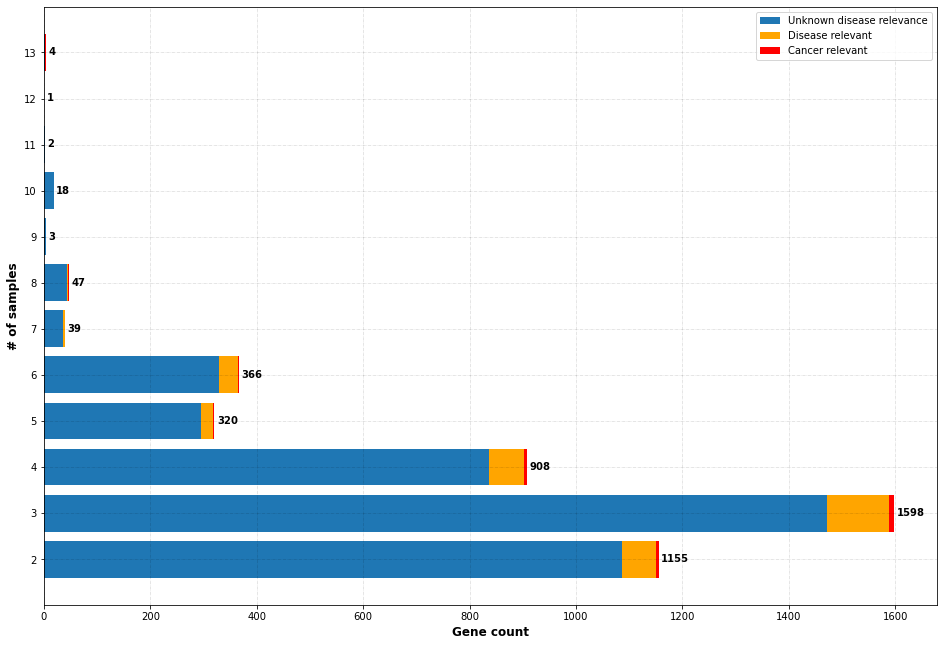

In [43]:
repeat_counts_main = count_elements(list(output_df_large_del_sorted_bigger_than_1['count']))
repeat_counts_relevant = count_elements(list(del_more_than_1_relevant['count']))
repeat_counts_cancer = count_elements(list(del_more_than_1_cancer['count']))

sorted_labels = sorted(repeat_counts_main)

plot_list_main = []
plot_list_relevant = []
plot_list_cancer = []

for label in sorted_labels:
    
    temp_cancer_count = repeat_counts_cancer[label] if label in sorted(repeat_counts_cancer) else 0
    temp_relevant_count = repeat_counts_relevant[label] if label in sorted(repeat_counts_relevant) else 0
    temp_main_count = repeat_counts_main[label] if label in sorted(repeat_counts_main) else 0
    
    plot_list_cancer.append(temp_cancer_count)
    plot_list_relevant.append(temp_relevant_count - temp_cancer_count)
    plot_list_main.append(temp_main_count - temp_relevant_count)

plot_list_main = np.array(plot_list_main)
plot_list_relevant = np.array(plot_list_relevant)
plot_list_cancer = np.array(plot_list_cancer)

sorted_labels_str = [str(x) for x in sorted_labels]

fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.set_facecolor('white')
_ = ax.barh(sorted_labels_str, plot_list_main, align='center', label='Unknown disease relevance')
_ = ax.barh(sorted_labels_str, plot_list_relevant, align='center', color = 'orange', \
            label='Disease relevant', left = plot_list_main)
_ = ax.barh(sorted_labels_str, plot_list_cancer, align='center', color = 'red', \
            label='Cancer relevant', left = plot_list_main+plot_list_relevant)

# Add annotation to bars

totals = [(plot_list_cancer[i] + plot_list_relevant[i] + plot_list_main[i]) for i in range(len(sorted_labels_str))]
for i in range(len(sorted_labels_str)):
    plt.text(totals[i] + 5, ax.patches[i].get_y() + 0.345, \
             str(plot_list_main[i] + plot_list_relevant[i] + plot_list_cancer[i]), \
             fontsize = 10, fontweight ='bold', color ='black')

_ = ax.set_yticks(sorted_labels_str)

_ = ax.legend()
_ = ax.grid(b = True, color ='black',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)


_ = ax.set_xlabel('Gene count', fontweight ='bold', color = 'black', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', color = 'black', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_del_annotated_gene_repeats.png', bbox_inches='tight', dpi=150)

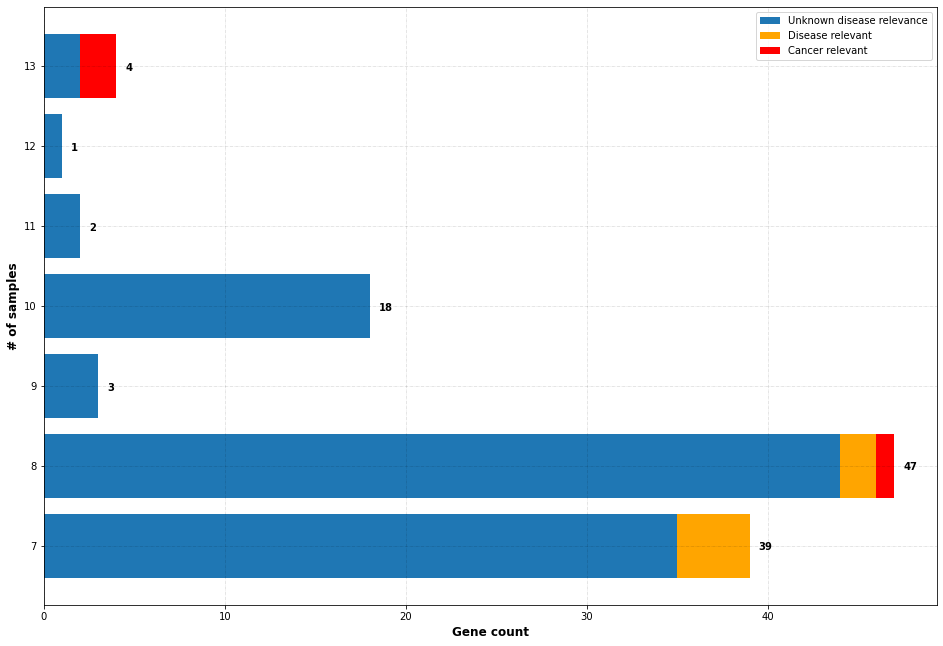

In [44]:
repeat_counts_main = count_elements(list(output_df_large_del_sorted_bigger_than_1['count']))
repeat_counts_relevant = count_elements(list(del_more_than_1_relevant['count']))
repeat_counts_cancer = count_elements(list(del_more_than_1_cancer['count']))

sorted_labels = [i for i in sorted(repeat_counts_main) if i >= 7]

plot_list_main = []
plot_list_relevant = []
plot_list_cancer = []

for label in sorted_labels:
    
    temp_cancer_count = repeat_counts_cancer[label] if label in sorted(repeat_counts_cancer) else 0
    temp_relevant_count = repeat_counts_relevant[label] if label in sorted(repeat_counts_relevant) else 0
    temp_main_count = repeat_counts_main[label] if label in sorted(repeat_counts_main) else 0
    
    plot_list_cancer.append(temp_cancer_count)
    plot_list_relevant.append(temp_relevant_count - temp_cancer_count)
    plot_list_main.append(temp_main_count - temp_relevant_count)

plot_list_main = np.array(plot_list_main)
plot_list_relevant = np.array(plot_list_relevant)
plot_list_cancer = np.array(plot_list_cancer)

sorted_labels_str = [str(x) for x in sorted_labels]

fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.set_facecolor('white')
_ = ax.barh(sorted_labels_str, plot_list_main, align='center', label='Unknown disease relevance')
_ = ax.barh(sorted_labels_str, plot_list_relevant, align='center', color = 'orange', \
            label='Disease relevant', left = plot_list_main)
_ = ax.barh(sorted_labels_str, plot_list_cancer, align='center', color = 'red', \
            label='Cancer relevant', left = plot_list_main+plot_list_relevant)

# Add annotation to bars

totals = [(plot_list_cancer[i] + plot_list_relevant[i] + plot_list_main[i]) for i in range(len(sorted_labels_str))]
for i in range(len(sorted_labels_str)):
    plt.text(totals[i] + 0.5, ax.patches[i].get_y() + 0.345, \
             str(plot_list_main[i] + plot_list_relevant[i] + plot_list_cancer[i]), \
             fontsize = 10, fontweight ='bold', color ='black')

_ = ax.set_yticks(sorted_labels_str)

_ = ax.legend()
_ = ax.grid(b = True, color ='black',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)


_ = ax.set_xlabel('Gene count', fontweight ='bold', color = 'black', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', color = 'black', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_del_annotated_gene_repeats_top_zoomed.png', bbox_inches='tight', dpi=150)

### Large DUPs


In [45]:

output_df_large_dup_sorted_bigger_than_1 = \
output_df_large_dup_sorted[output_df_large_dup_sorted['count'] > 1]

output_df_large_dup_sorted_equal_to_1 = \
output_df_large_dup_sorted[output_df_large_dup_sorted['count'] == 1]

In [47]:
len(output_df_large_dup_sorted)

8392

In [48]:
len(output_df_large_dup_sorted[output_df_large_dup_sorted['count'] > 1])

4004

In [49]:
len(output_df_large_dup_sorted[output_df_large_dup_sorted['count'] == 1])

4388

In [50]:
temp_df = output_df_large_dup_sorted_equal_to_1[output_df_large_dup_sorted_equal_to_1['disease_label'] != 'N/A']
len(temp_df)

386

In [51]:
temp_df[temp_df['gcep'].str.contains('Cancer')]

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
4694,chr4,54657267,54740783,ENSG00000157404.17,KIT,protein_coding,[X_R_SMTB814],1,1,1,gastrointestinal stromal tumor,Definitive,Hereditary Cancer
4695,chr4,54229280,54298245,ENSG00000134853.12,PDGFRA,protein_coding,[X_R_SMTB814],1,1,1,gastrointestinal stromal tumor,Definitive,Hereditary Cancer
4776,chr5,177511577,177516961,ENSG00000183258.12,DDX41,protein_coding,[X_R_SMTB241],1,1,1,DDX41-related hematologic malignancy predispos...,Definitive,Hereditary Cancer
5014,chr11,44095648,44251962,ENSG00000151348.16,EXT2,protein_coding,[X_R_SMTB814],1,1,1,"exostoses, multiple, type 2",Definitive,Hereditary Cancer
5168,chr16,2039815,2047866,ENSG00000065057.9,NTHL1,protein_coding,[X_R_SMTB241],1,1,1,NTHL1-deficiency tumor predisposition syndrome,Definitive,Hereditary Cancer
5307,chr9,127815013,127854658,ENSG00000106991.14,ENG,protein_coding,[M_P_GBM672],1,1,1,juvenile polyposis syndrome,Limited,Hereditary Cancer
5492,chr12,57747727,57756013,ENSG00000135446.17,CDK4,protein_coding,[P_P_SMTB123],1,1,1,"melanoma, cutaneous malignant, susceptibility ...",Definitive,Hereditary Cancer
5667,chr19,50384204,50418018,ENSG00000062822.16,POLD1,protein_coding,[M_P_GBM672],1,1,1,Polymerase proofreading-related adenomatous po...,Definitive,Colon Cancer
5681,chr19,45349837,45370918,ENSG00000104884.17,ERCC2,protein_coding,[M_P_GBM672],1,1,1,xeroderma pigmentosum group D,Definitive,Hereditary Cancer
5820,chr16,13920138,13952348,ENSG00000175595.16,ERCC4,protein_coding,[X_R_SMTB241],1,1,1,xeroderma pigmentosum group F,Definitive,Hereditary Cancer


In [52]:
count_elements(list(output_df_large_dup_sorted_bigger_than_1['count']))

{15: 1,
 14: 1,
 13: 14,
 12: 53,
 11: 174,
 10: 142,
 9: 215,
 8: 177,
 7: 44,
 6: 47,
 5: 53,
 4: 82,
 3: 600,
 2: 2401}

In [53]:
dup_more_than_1_relevant = output_df_large_dup_sorted_bigger_than_1[output_df_large_dup_sorted_bigger_than_1['disease_label'] != 'N/A']
dup_more_than_1_relevant

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
2,chr7,78017055,79453667,ENSG00000187391.22,MAGI2,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, H_R_GBM49...",13,13,13,epilepsy,Disputed,Epilepsy
16,chr7,116524994,116561179,ENSG00000105974.13,CAV1,protein_coding,"[A_R_GBM607, C_P_GBM577, E_RR_GBM937, G_R_GBM8...",12,12,12,pulmonary arterial hypertension,Definitive,Pulmonary Hypertension
17,chr7,116672196,116798377,ENSG00000105976.16,MET,protein_coding,"[A_R_GBM607, C_P_GBM577, E_RR_GBM937, G_R_GBM8...",12,12,12,papillary renal cell carcinoma,Definitive,Hereditary Cancer
23,chr7,79768028,80226181,ENSG00000127955.17,GNAI1,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",12,12,12,complex neurodevelopmental disorder,Definitive,Intellectual Disability and Autism
25,chr7,91940840,92110673,ENSG00000127914.19,AKAP9,protein_coding,"[C_P_GBM577, E_RR_GBM937, G_R_GBM833, J_P_GBM4...",12,12,12,long QT syndrome,Disputed,Long QT Syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,chr19,16324826,16328685,ENSG00000127528.6,KLF2,protein_coding,"[F_R_GBM691, M_P_GBM672]",2,2,2,pulmonary arterial hypertension,Limited,Pulmonary Hypertension
3945,chr19,12646511,12666742,ENSG00000104774.13,MAN2B1,protein_coding,"[F_R_GBM691, M_P_GBM672]",2,2,2,alpha-mannosidosis,Definitive,Lysosomal Diseases
3974,chr19,18153163,18170532,ENSG00000105647.19,PIK3R2,protein_coding,"[F_R_GBM691, M_P_GBM672]",2,2,2,overgrowth syndrome and/or cerebral malformati...,Definitive,Brain Malformations
3977,chr19,16892951,17026815,ENSG00000160111.15,CPAMD8,protein_coding,"[F_R_GBM691, M_P_GBM672]",2,2,2,anterior segment dysgenesis 8,Definitive,Glaucoma and Neuro-Ophthalmology


In [54]:
count_elements(list(dup_more_than_1_relevant['count']))

{13: 1,
 12: 12,
 11: 10,
 10: 14,
 9: 11,
 8: 12,
 7: 3,
 6: 5,
 5: 6,
 4: 7,
 3: 46,
 2: 223}

In [55]:
dup_more_than_1_cancer = dup_more_than_1_relevant[dup_more_than_1_relevant['gcep'].str.contains('Cancer')]
dup_more_than_1_cancer

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
17,chr7,116672196,116798377,ENSG00000105976.16,MET,protein_coding,"[A_R_GBM607, C_P_GBM577, E_RR_GBM937, G_R_GBM8...",12,12,12,papillary renal cell carcinoma,Definitive,Hereditary Cancer
31,chr7,55019017,55211628,ENSG00000146648.21,EGFR,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",12,12,12,non-small cell lung carcinoma,Definitive,Hereditary Cancer
293,chr7,105532169,105567677,ENSG00000135249.8,RINT1,protein_coding,"[A_R_GBM607, C_P_GBM577, G_R_GBM833, J_P_GBM40...",10,10,10,hereditary breast carcinoma,Disputed,Breast/Ovarian Cancer
384,chr7,66987680,66995693,ENSG00000126524.12,SBDS,protein_coding,"[C_P_GBM577, F_R_GBM691, G_R_GBM833, J_P_GBM40...",10,10,10,Shwachman-Diamond syndrome,Definitive,Hereditary Cancer
857,chr7,5970925,6009130,ENSG00000122512.17,PMS2,protein_coding,"[G_R_GBM833, J_RR_GBM551, J_R_GBM498, N_P_BT20...",6,6,6,hereditary breast carcinoma,Disputed,Breast/Ovarian Cancer
893,chr7,152644776,152676193,ENSG00000196584.4,XRCC2,protein_coding,"[C_P_GBM577, J_P_GBM401, J_R_GBM498, N_R_GBM74...",5,5,5,hereditary breast carcinoma,Limited,Breast/Ovarian Cancer
895,chr7,142749468,142753072,ENSG00000204983.15,PRSS1,protein_coding,"[A_R_GBM607, G_R_GBM833, J_P_GBM401, O_P_GBM70...",5,5,5,hereditary chronic pancreatitis,Definitive,Hereditary Cancer
1036,chr19,33299934,33302534,ENSG00000245848.3,CEBPA,protein_coding,"[F_R_GBM691, M_P_GBM672, P_P_SMTB123]",3,3,3,acute myeloid leukemia,Definitive,Hereditary Cancer
1222,chr1,156147366,156177752,ENSG00000196189.14,SEMA4A,protein_coding,"[F_R_GBM691, H_P_GBM460, H_R_GBM492]",3,3,3,hereditary nonpolyposis colon cancer,Limited,Colon Cancer
1894,chr22,23786931,23838009,ENSG00000099956.20,SMARCB1,protein_coding,"[I_R_GBM532, N_R_GBM745]",2,2,2,rhabdoid tumor predisposition syndrome 1,Definitive,Hereditary Cancer


In [56]:
count_elements(list(dup_more_than_1_cancer['count']))

{12: 2, 10: 2, 6: 1, 5: 2, 3: 2, 2: 15}

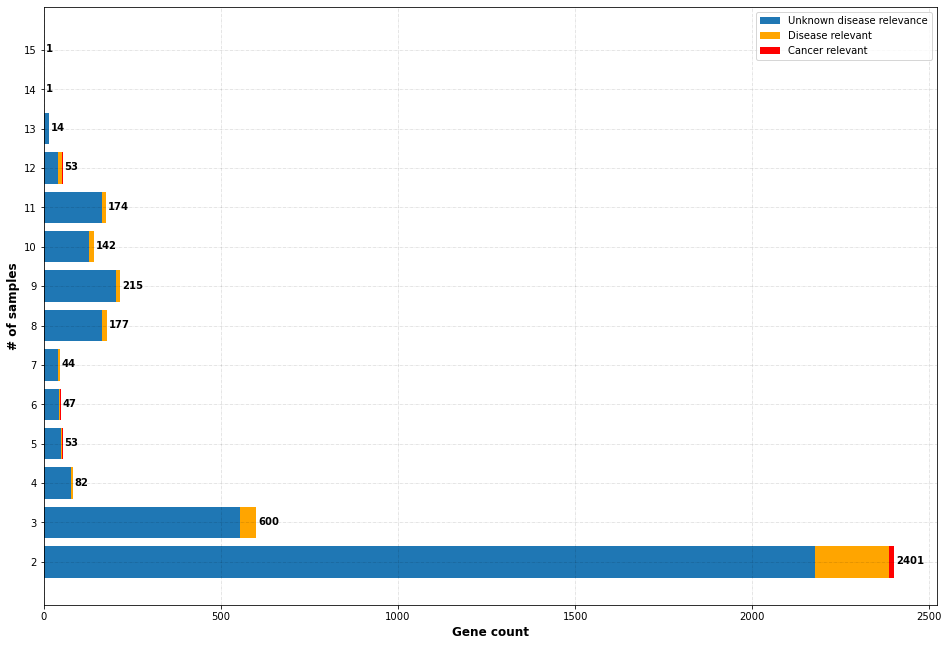

In [57]:
repeat_counts_main = count_elements(list(output_df_large_dup_sorted_bigger_than_1['count']))
repeat_counts_relevant = count_elements(list(dup_more_than_1_relevant['count']))
repeat_counts_cancer = count_elements(list(dup_more_than_1_cancer['count']))

sorted_labels = sorted(repeat_counts_main)

plot_list_main = []
plot_list_relevant = []
plot_list_cancer = []

for label in sorted_labels:
    
    temp_cancer_count = repeat_counts_cancer[label] if label in sorted(repeat_counts_cancer) else 0
    temp_relevant_count = repeat_counts_relevant[label] if label in sorted(repeat_counts_relevant) else 0
    temp_main_count = repeat_counts_main[label] if label in sorted(repeat_counts_main) else 0
    
    plot_list_cancer.append(temp_cancer_count)
    plot_list_relevant.append(temp_relevant_count - temp_cancer_count)
    plot_list_main.append(temp_main_count - temp_relevant_count)

plot_list_main = np.array(plot_list_main)
plot_list_relevant = np.array(plot_list_relevant)
plot_list_cancer = np.array(plot_list_cancer)

sorted_labels_str = [str(x) for x in sorted_labels]

fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.set_facecolor('white')
_ = ax.barh(sorted_labels_str, plot_list_main, align='center', label='Unknown disease relevance')
_ = ax.barh(sorted_labels_str, plot_list_relevant, align='center', color = 'orange', \
            label='Disease relevant', left = plot_list_main)
_ = ax.barh(sorted_labels_str, plot_list_cancer, align='center', color = 'red', \
            label='Cancer relevant', left = plot_list_main+plot_list_relevant)

# Add annotation to bars

totals = [(plot_list_cancer[i] + plot_list_relevant[i] + plot_list_main[i]) for i in range(len(sorted_labels_str))]
for i in range(len(sorted_labels_str)):
    plt.text(totals[i] + 5, ax.patches[i].get_y() + 0.345, \
             str(plot_list_main[i] + plot_list_relevant[i] + plot_list_cancer[i]), \
             fontsize = 10, fontweight ='bold', color ='black')

_ = ax.set_yticks(sorted_labels_str)

_ = ax.legend()
_ = ax.grid(b = True, color ='black',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)


_ = ax.set_xlabel('Gene count', fontweight ='bold', color = 'black', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', color = 'black', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_dup_annotated_gene_repeats.png', bbox_inches='tight', dpi=150)

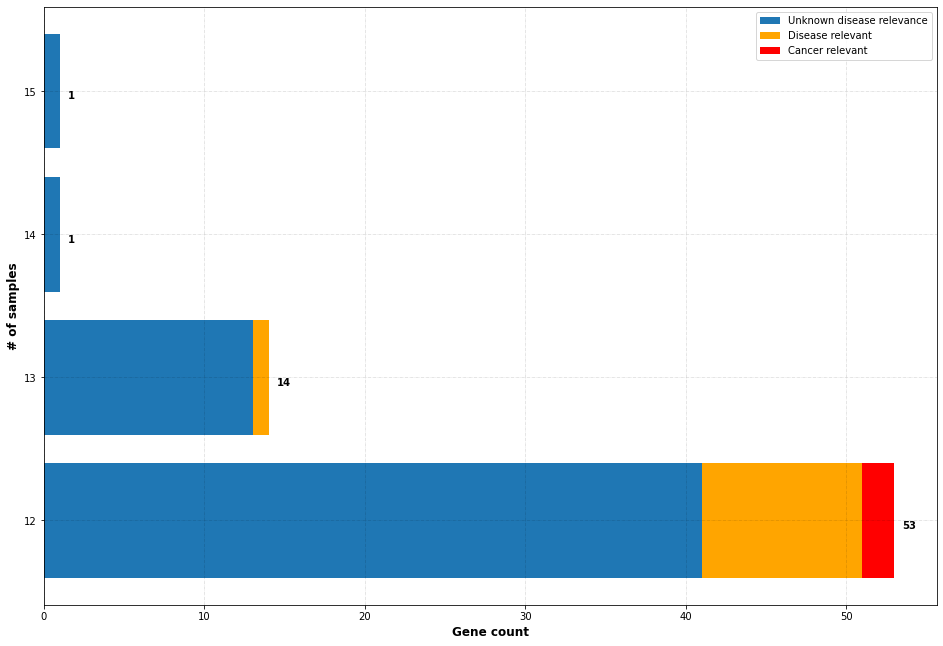

In [58]:
repeat_counts_main = count_elements(list(output_df_large_dup_sorted_bigger_than_1['count']))
repeat_counts_relevant = count_elements(list(dup_more_than_1_relevant['count']))
repeat_counts_cancer = count_elements(list(dup_more_than_1_cancer['count']))

sorted_labels = [i for i in sorted(repeat_counts_main) if i >= 12]

plot_list_main = []
plot_list_relevant = []
plot_list_cancer = []

for label in sorted_labels:
    
    temp_cancer_count = repeat_counts_cancer[label] if label in sorted(repeat_counts_cancer) else 0
    temp_relevant_count = repeat_counts_relevant[label] if label in sorted(repeat_counts_relevant) else 0
    temp_main_count = repeat_counts_main[label] if label in sorted(repeat_counts_main) else 0
    
    plot_list_cancer.append(temp_cancer_count)
    plot_list_relevant.append(temp_relevant_count - temp_cancer_count)
    plot_list_main.append(temp_main_count - temp_relevant_count)

plot_list_main = np.array(plot_list_main)
plot_list_relevant = np.array(plot_list_relevant)
plot_list_cancer = np.array(plot_list_cancer)

sorted_labels_str = [str(x) for x in sorted_labels]

fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.set_facecolor('white')
_ = ax.barh(sorted_labels_str, plot_list_main, align='center', label='Unknown disease relevance')
_ = ax.barh(sorted_labels_str, plot_list_relevant, align='center', color = 'orange', \
            label='Disease relevant', left = plot_list_main)
_ = ax.barh(sorted_labels_str, plot_list_cancer, align='center', color = 'red', \
            label='Cancer relevant', left = plot_list_main+plot_list_relevant)

# Add annotation to bars

totals = [(plot_list_cancer[i] + plot_list_relevant[i] + plot_list_main[i]) for i in range(len(sorted_labels_str))]
for i in range(len(sorted_labels_str)):
    plt.text(totals[i] + 0.5, ax.patches[i].get_y() + 0.345, \
             str(plot_list_main[i] + plot_list_relevant[i] + plot_list_cancer[i]), \
             fontsize = 10, fontweight ='bold', color ='black')

_ = ax.set_yticks(sorted_labels_str)

_ = ax.legend()
_ = ax.grid(b = True, color ='black',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)


_ = ax.set_xlabel('Gene count', fontweight ='bold', color = 'black', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', color = 'black', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_dup_annotated_gene_repeats_top_zoomed.png', bbox_inches='tight', dpi=150)

### Large INVs


In [59]:

output_df_large_inv_sorted_bigger_than_1 = \
output_df_large_inv_sorted[output_df_large_inv_sorted['count'] > 1]

output_df_large_inv_sorted_equal_to_1 = \
output_df_large_inv_sorted[output_df_large_inv_sorted['count'] == 1]

In [61]:
len(output_df_large_inv_sorted)

222

In [62]:
len(output_df_large_inv_sorted[output_df_large_inv_sorted['count'] > 1])

65

In [63]:
len(output_df_large_inv_sorted[output_df_large_inv_sorted['count'] == 1])

157

In [64]:
temp_df = output_df_large_inv_sorted_equal_to_1[output_df_large_inv_sorted_equal_to_1['disease_label'] != 'N/A']
len(temp_df)

17

In [65]:
temp_df[temp_df['gcep'].str.contains('Cancer')]

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
217,chr7,55019017,55211628,ENSG00000146648.21,EGFR,protein_coding,[F_R_GBM691],1,1,1,non-small cell lung carcinoma,Definitive,Hereditary Cancer


In [66]:
count_elements(list(output_df_large_inv_sorted_bigger_than_1['count']))

{10: 2, 6: 1, 5: 6, 4: 13, 3: 12, 2: 31}

In [67]:
inv_more_than_1_relevant = output_df_large_inv_sorted_bigger_than_1[output_df_large_inv_sorted_bigger_than_1['disease_label'] != 'N/A']
inv_more_than_1_relevant

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep
17,chrX,155489011,155719098,ENSG00000185973.12,TMLHE,protein_coding,"[F_R_GBM691, H_P_GBM460, J_R_GBM498, O_P_GBM703]",4,4,3,autism spectrum disorder,Disputed,Intellectual Disability and Autism
29,chr13,113667219,113737736,ENSG00000185974.7,GRK1,protein_coding,"[C_R_GBM625, N_R_GBM745, O_R_SMTB781]",3,3,3,Oguchi disease,Definitive,Retina
41,chr19,36003307,36008813,ENSG00000181392.17,SYNE4,protein_coding,"[N_P_BT2013110, N_R_GBM745]",2,2,2,nonsyndromic genetic hearing loss,Moderate,Hearing Loss
42,chr19,35995188,35996312,ENSG00000205138.4,SDHAF1,protein_coding,"[N_P_BT2013110, N_R_GBM745]",2,2,2,Leigh syndrome,Limited,Mitochondrial Diseases
50,chr19,35799988,35813299,ENSG00000250799.11,PRODH2,protein_coding,"[N_P_BT2013110, N_R_GBM745]",2,2,2,hydroxyprolinemia,Limited,Aminoacidopathy
55,chr5,1392794,1445440,ENSG00000142319.18,SLC6A3,protein_coding,"[J_RR_GBM551, J_R_GBM498]",2,2,2,SLC6A3-related dopamine transporter deficiency...,Definitive,General Inborn Errors of Metabolism


In [68]:
count_elements(list(inv_more_than_1_relevant['count']))

{4: 1, 3: 1, 2: 4}

In [69]:
inv_more_than_1_cancer = inv_more_than_1_relevant[inv_more_than_1_relevant['gcep'].str.contains('Cancer')]
inv_more_than_1_cancer

,chr,start,end,gene_id,gene_name,gene_type,input_sample_ids,count,exon_count,CDS_count,disease_label,classification,gcep


In [70]:
count_elements(list(inv_more_than_1_cancer['count']))

{}

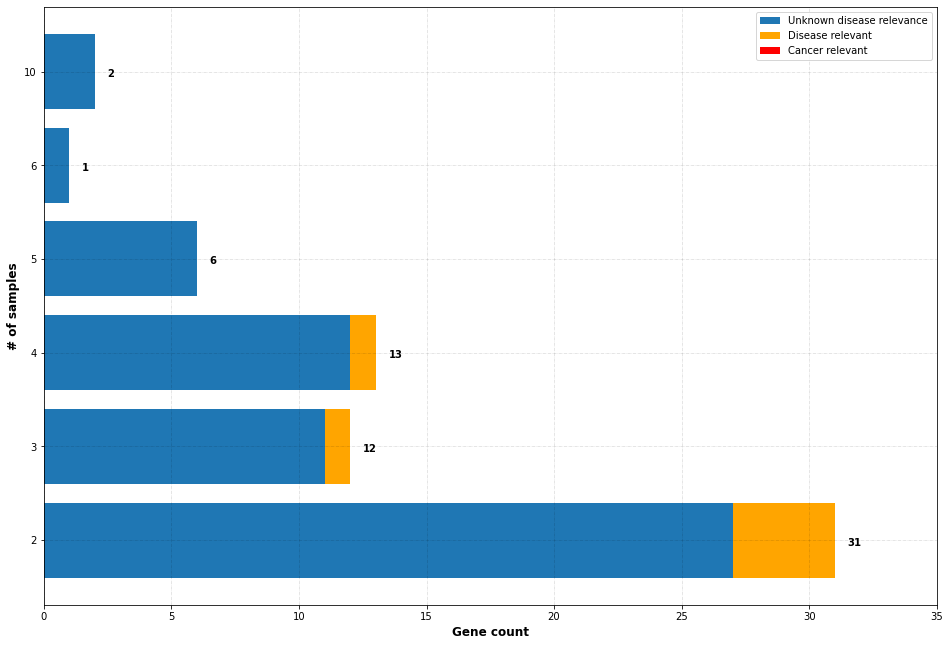

In [71]:
repeat_counts_main = count_elements(list(output_df_large_inv_sorted_bigger_than_1['count']))
repeat_counts_relevant = count_elements(list(inv_more_than_1_relevant['count']))
repeat_counts_cancer = count_elements(list(inv_more_than_1_cancer['count']))

sorted_labels = sorted(repeat_counts_main)

plot_list_main = []
plot_list_relevant = []
plot_list_cancer = []

for label in sorted_labels:
    
    temp_cancer_count = repeat_counts_cancer[label] if label in sorted(repeat_counts_cancer) else 0
    temp_relevant_count = repeat_counts_relevant[label] if label in sorted(repeat_counts_relevant) else 0
    temp_main_count = repeat_counts_main[label] if label in sorted(repeat_counts_main) else 0
    
    plot_list_cancer.append(temp_cancer_count)
    plot_list_relevant.append(temp_relevant_count - temp_cancer_count)
    plot_list_main.append(temp_main_count - temp_relevant_count)

plot_list_main = np.array(plot_list_main)
plot_list_relevant = np.array(plot_list_relevant)
plot_list_cancer = np.array(plot_list_cancer)

sorted_labels_str = [str(x) for x in sorted_labels]

fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.set_facecolor('white')
_ = ax.barh(sorted_labels_str, plot_list_main, align='center', label='Unknown disease relevance')
_ = ax.barh(sorted_labels_str, plot_list_relevant, align='center', color = 'orange', \
            label='Disease relevant', left = plot_list_main)
_ = ax.barh(sorted_labels_str, plot_list_cancer, align='center', color = 'red', \
            label='Cancer relevant', left = plot_list_main+plot_list_relevant)

# Add annotation to bars

totals = [(plot_list_cancer[i] + plot_list_relevant[i] + plot_list_main[i]) for i in range(len(sorted_labels_str))]
for i in range(len(sorted_labels_str)):
    plt.text(totals[i] + 0.5, ax.patches[i].get_y() + 0.345, \
             str(plot_list_main[i] + plot_list_relevant[i] + plot_list_cancer[i]), \
             fontsize = 10, fontweight ='bold', color ='black')

_ = ax.set_yticks(sorted_labels_str)

_ = ax.legend()
_ = ax.grid(b = True, color ='black',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)


_ = ax.set_xlabel('Gene count', fontweight ='bold', color = 'black', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', color = 'black', fontsize=12)
_ = plt.xlim([0, 35])

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_inv_annotated_gene_repeats.png', bbox_inches='tight', dpi=150)